### Week 3 & 4
### DSC 540
### Abed Tabbalat

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import permutations, dropwhile, zip_longest
import math

# Part 1

###### Data Wrangling with Python: Activity 5 page 116

In [2]:
# importing dataframe
df = pd.read_csv("Boston_housing.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# finding total number of records
df.shape

(506, 14)

In [4]:
# filtering out CHAS, NOX, B and LSTAT, and checking the last 7 rows
df_f = df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'PRICE']]
df_f.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


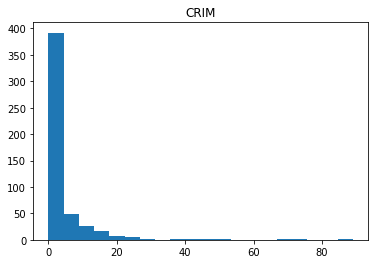

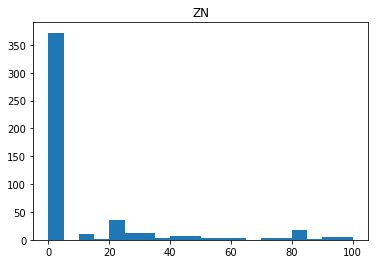

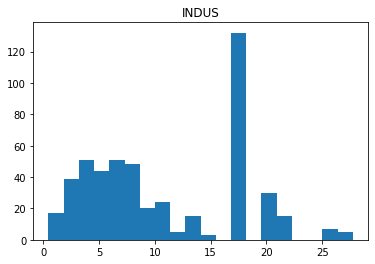

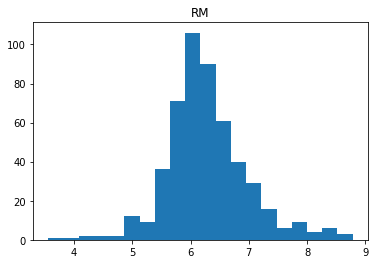

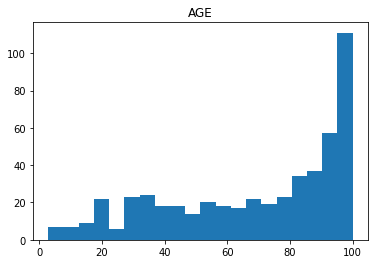

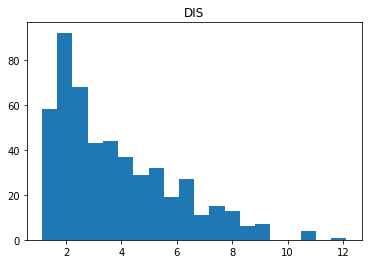

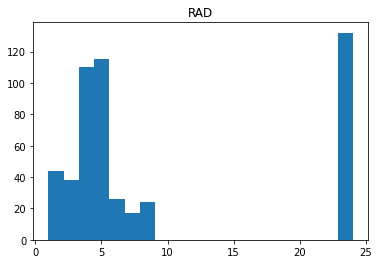

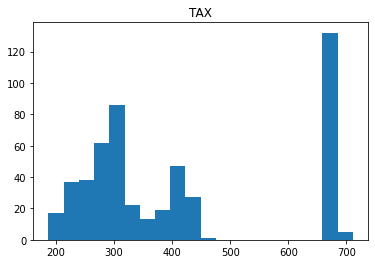

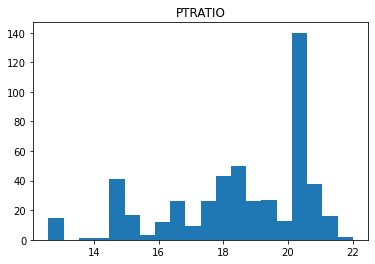

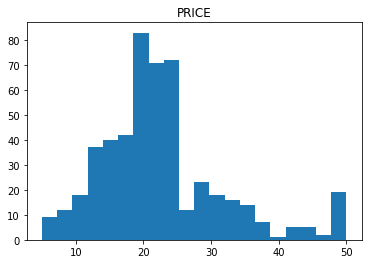

In [5]:
# Plotting histogram for all components in df_f.
for col in df_f.columns:
    plt.hist(df_f[col], bins=20)
    plt.title(col)
    plt.show()

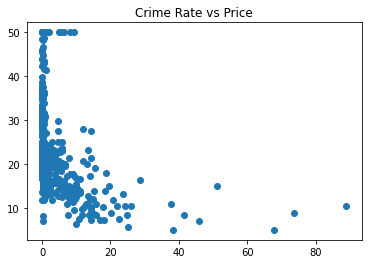

In [6]:
# Scatter plot crime rate vs price.
plt.scatter(df_f['CRIM'], df_f['PRICE'])
plt.title('Crime Rate vs Price')
plt.show()

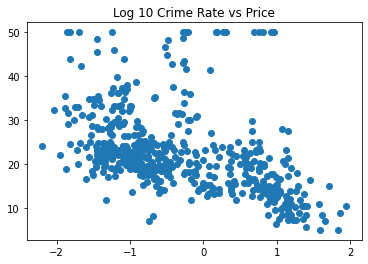

In [7]:
# Scatter plot log10 crime rate vs price.
plt.scatter(np.log10(df_f['CRIM']), df_f['PRICE'])
plt.title('Log 10 Crime Rate vs Price')
plt.show()

In [8]:
# Calculating the mean rooms per dwelling.
df_f['RM'].mean()

6.284634387351787

In [9]:
# Calculating median age.
df_f['AGE'].median()

77.5

In [10]:
# Calculating average distances to five Boston employment centers.
df_f['DIS'].mean()

3.795042687747034

In [11]:
less_20k = df_f['PRICE']<20
pct = less_20k.mean()*100
print(pct)

41.50197628458498


# Part 2

###### Data Wrangling with Python: Activity 6 page 171

In [12]:
# importing adult income data.
df_2 = pd.read_csv('adult_income_data.csv')
df_2.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [13]:
# Reading line by line and extracting the first line of csv file:
header = []
with open('adult_income_names.txt', 'r') as fst_line:
    for line in fst_line:
        fst_line.readline()
        h = line.split(':')[0]
        header.append(h)
header

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [14]:
# Adding a name of Income in header:
header.append('Income')

In [15]:
#replacing original column names with the ones in the txt file:
df_2 = pd.read_csv('adult_income_data.csv', names=header)
df_2.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
h_class = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex', 'native-country']
for c in h_class:
    class1 = df_2[c].unique()
    class_amt = df_2[c].nunique()
    print(f'{class_amt} variables in {c} column. Which are: {class1}')
    print('-' * 120)

9 variables in workclass column. Which are: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
------------------------------------------------------------------------------------------------------------------------
16 variables in education column. Which are: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
------------------------------------------------------------------------------------------------------------------------
7 variables in marital-status column. Which are: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
------------------------------------------------------------------------------------------------------------------------
15 variables in occupation column. Which are: [' Adm-clerical

In [20]:
# finding missing values:
df_2.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [21]:
# filtering dataset to only include age, education, and occupation
df_f2 = df_2[['age', 'education', 'occupation']]
df_f2.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


<AxesSubplot:>

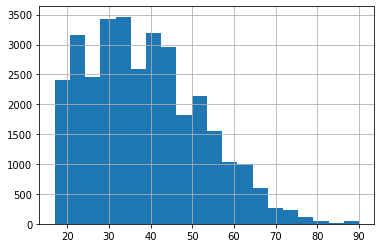

In [22]:
# Age histogram with Bin size 20
df_f2['age'].hist(bins=20)

In [23]:
# Creating whitespace strip function:
def whitespace(character):
    return character.strip()

In [25]:
# Applying function to all columns using apply:
df_f2['education_modified'] = df_f2['education'].apply(whitespace)
df_f2['occupation_modified'] = df_f2['occupation'].apply(whitespace)

df_f2['education'] = df_f2['education_modified']
df_f2['occupation'] = df_f2['occupation_modified']

df_f2.drop(labels=['education_modified'], axis=1, inplace=True)
df_f2.drop(labels=['occupation_modified'], axis=1, inplace=True)
df_f2.head()

<ipython-input-25-4d8eb7fe497b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f2['education_modified'] = df_f2['education'].apply(whitespace)
<ipython-input-25-4d8eb7fe497b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f2['occupation_modified'] = df_f2['occupation'].apply(whitespace)
<ipython-input-25-4d8eb7fe497b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


In [30]:
# Finding the number of people aged between 30 and 50:
df_mf2 = df_f2[(df_f2['age'] >= 30) & (df_f2['age'] <= 50)]
df_mf2.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service


In [31]:
rslt = df_mf2.shape[0]
rslt

16390

In [32]:
# Grouping the records based on occupation to find mean age:
df_f2.groupby('occupation').describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


# Part 3

#### a
Series 1 = 7.3, -2.5, 3.4, 1.5
i. Index = ‘a’, ‘c’, ‘d’, ‘e’

In [38]:
list1 = [7.3, -2.5, 3.4, 3.4]
array1 = np.array(list1)
series1 = pd.Series(data=list1, index=['a', 'c', 'd', 'e'])
series1

a    7.3
c   -2.5
d    3.4
e    3.4
dtype: float64

#### b
Series 2 = -2.1, 3.6, -1.5, 4, 3.1
i. Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’

In [39]:
list2 = [-2.1, 3.6, -1.5, 4, 3.1]
array2 = np.array(list2)
series2 = pd.Series(data=array2, index=['a', 'c', 'e', 'f', 'g'])
series2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

#### c
Add Series 1 and Series 2 together and print the results

In [40]:
add = series1 + series2
add

a    5.2
c    1.1
d    NaN
e    1.9
f    NaN
g    NaN
dtype: float64

#### d
Subtract Series 1 from Series 2 and print the results

In [42]:
subtract = series2 - series1
subtract

a   -9.4
c    6.1
d    NaN
e   -4.9
f    NaN
g    NaN
dtype: float64